In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

raw_data = pd.read_csv('credit_card_data.csv')


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


class Kmeans:

    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        #list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        #store the centers (mean vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        #optm clusters
        for _ in range(self.max_iters):
            #assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            #calculate new centroids from clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()
            
        #return cluster labels
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        #each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels


    def _create_clusters(self, centroids):
        #assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            distances = [euclidean_distance(sample, point) for point in centroids]
            closest_idx = np.argmin(distances)
            clusters[closest_idx].append(idx)
        return clusters


    def _get_centroids(self, clusters):
        #assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids


    def _is_converged(self, centroids_old, centroids):
        #distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0


ModuleNotFoundError: No module named 'matplotlib'

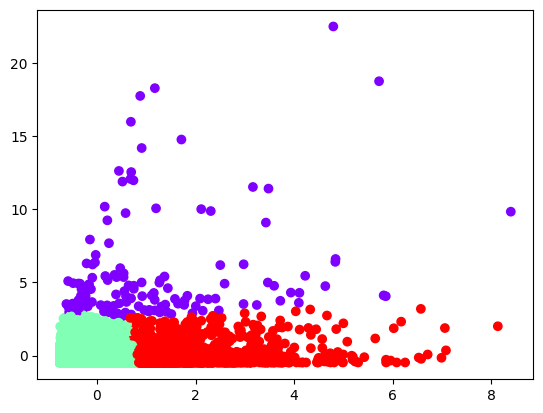

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#load data
data = pd.read_csv('credit_card_dataset.csv')

#preprocess data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['BALANCE', 'PURCHASES']])

#train K-means model
kmeans = Kmeans(K=3, max_iters=100, plot_steps=False)
labels = kmeans.predict(scaled_data)

#visualize results
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='rainbow')
plt.show()
